<a href="https://colab.research.google.com/github/IshaqKHATTAK/Computer-Vision/blob/main/YOLOV5_ON_TRAFFIC_SIGN(self_driving_cars).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#pip install kaggle

In [ ]:

from google.colab import files
video = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed

In [ ]:

!cp kaggle.json ~/.kaggle/ # move the key to the folder

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json  #changin the permission

In [ ]:
!kaggle datasets download valentynsichkar/traffic-signs-dataset-in-yolo-format

 99% 248M/250M [00:12<00:00, 22.5MB/s]
100% 250M/250M [00:12<00:00, 21.0MB/s]


In [ ]:
!unzip traffic-signs-dataset-in-yolo-format.zip

Archive:  traffic-signs-dataset-in-yolo-format.zip
  inflating: classes.names           
  inflating: getting-full-path.py    
  inflating: test.txt                
  inflating: traffic-sign-to-test.mp4  
  inflating: train.txt               
  inflating: ts/ts/00000.jpg         
  inflating: ts/ts/00000.txt         
  inflating: ts/ts/00001.jpg         
  inflating: ts/ts/00001.txt         
  inflating: ts/ts/00002.jpg         
  inflating: ts/ts/00002.txt         
  inflating: ts/ts/00003.jpg         
  inflating: ts/ts/00003.txt         
  inflating: ts/ts/00004.jpg         
  inflating: ts/ts/00004.txt         
  inflating: ts/ts/00005.jpg         
  inflating: ts/ts/00005.txt         
  inflating: ts/ts/00006.jpg         
  inflating: ts/ts/00006.txt         
  inflating: ts/ts/00007.jpg         
  inflating: ts/ts/00007.txt         
  inflating: ts/ts/00008.jpg         
  inflating: ts/ts/00008.txt         
  inflating: ts/ts/00009.jpg         
  inflating: ts/ts/00009.txt       

In [ ]:
!python -m pip install --upgrade pip

!pip install tensorflow==2.3.1

!pip install tensorboard==2.4.1
!pip install torch  #YOLOv5 runs on top of PyTorch, so we need to import it to the notebook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.3.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch # YOLOv5 implemented using pytorch

In [ ]:
from IPython.display import Image #this is to render predictions

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15647, done.
remote: Counting objects: 100% (254/254), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 15647 (delta 130), reused 173 (delta 98), pack-reused 15393
Receiving objects: 100% (15647/15647), 14.65 MiB | 8.82 MiB/s, done.
Resolving deltas: 100% (10658/10658), done.


In [ ]:
%cd yolov5

/content/yolov5/yolov5


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Divide the dataset into train test folder

In [ ]:
import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]



#setup dir names
trainPath = '/content/dataset/images/train'
valPath = '/content/dataset/images/val'
crsPath = '/content/ts/ts' #dir where images and annotations stored


#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

In [ ]:
trainimagePath = '/content/dataset/images/train'
trainlabelPath = '/content/dataset/labels/train'
valimagePath = '/content/dataset/images/val'
vallabelPath = '/content/dataset/labels/val'


#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)


    #cycle for test dir
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))

    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

    #rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath)

'/content/dataset/images/val/ts'

In [ ]:
%pwd

'/content/yolov5/yolov5'

In [ ]:
%cd /content/yolov5/data

/content/yolov5/data


In [ ]:
%pwd

'/content/yolov5/data'

In [ ]:
from google.colab import files
video = files.upload()

Saving dataset.yaml to dataset.yaml


In [ ]:
%cd /content/yolov5
%pwd

/content/yolov5


'/content/yolov5'

In [ ]:
!python train.py --img 415 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5s.pt --cache
#train.py we use for traing yolo on our data
#img 415 is the image size
#yolov5.pt is the file containnig the weight of the already trained yolo algo

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-163-g016e046 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 5, in <module>
    from tensorboard.main import run_main
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/main.py", line 43, in <module>
    from tensorboard import default
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/default.py", line 36, in <module>
    from tensorboard.plugins.audio import audio_plugin
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/plugins/audio/audio_plugin.py", line 25, in <module>
    from tensorboard import plugin_util
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/plugin_util.py", line 23, in <module>
    from tensorboard._vendor.bleach.sanitizer import Cleaner
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/_vendor/bleach/__init__.py", line 5, in <module>
    from tensorboard._vendor.bleach.linkifier import (
  File "/usr/local/lib/python3.10/dist-pa

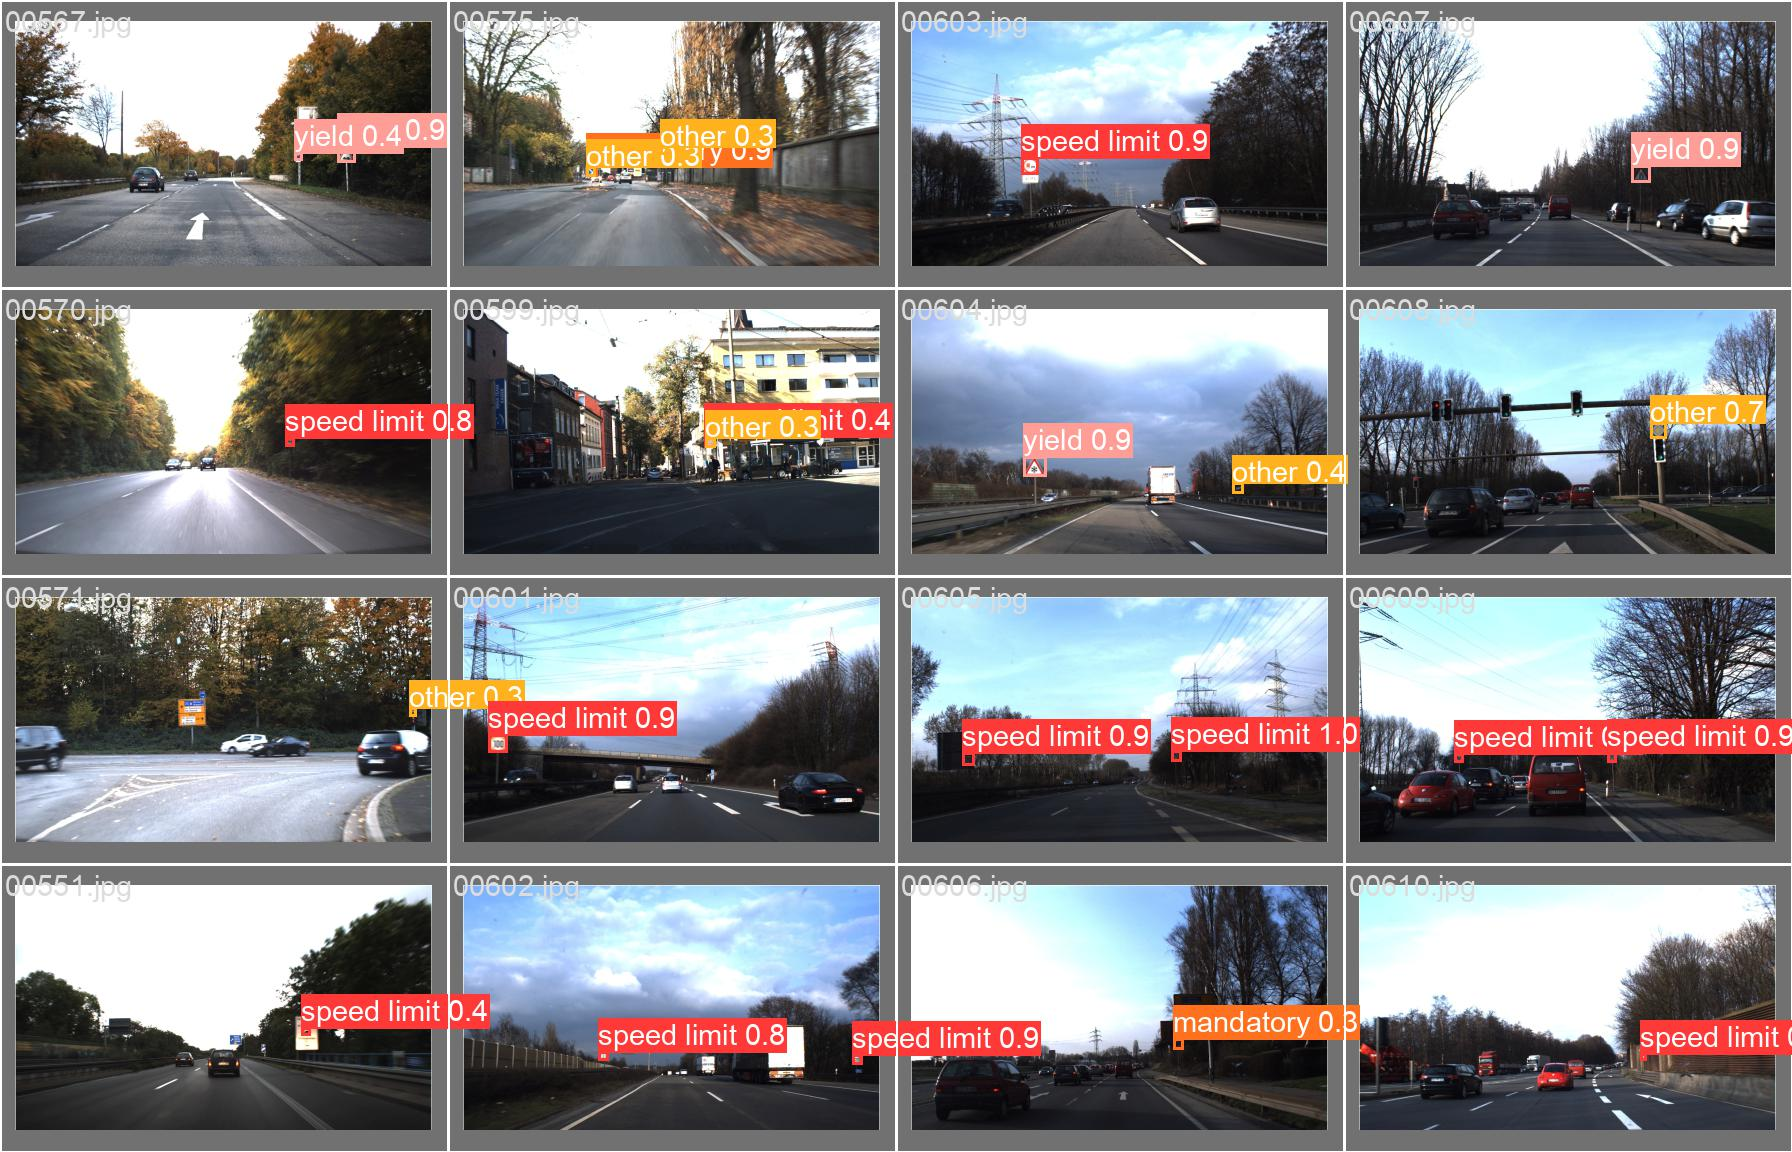

In [ ]:

Image(filename='/content/yolov5/runs/train/exp/val_batch2_pred.jpg', width=1000)

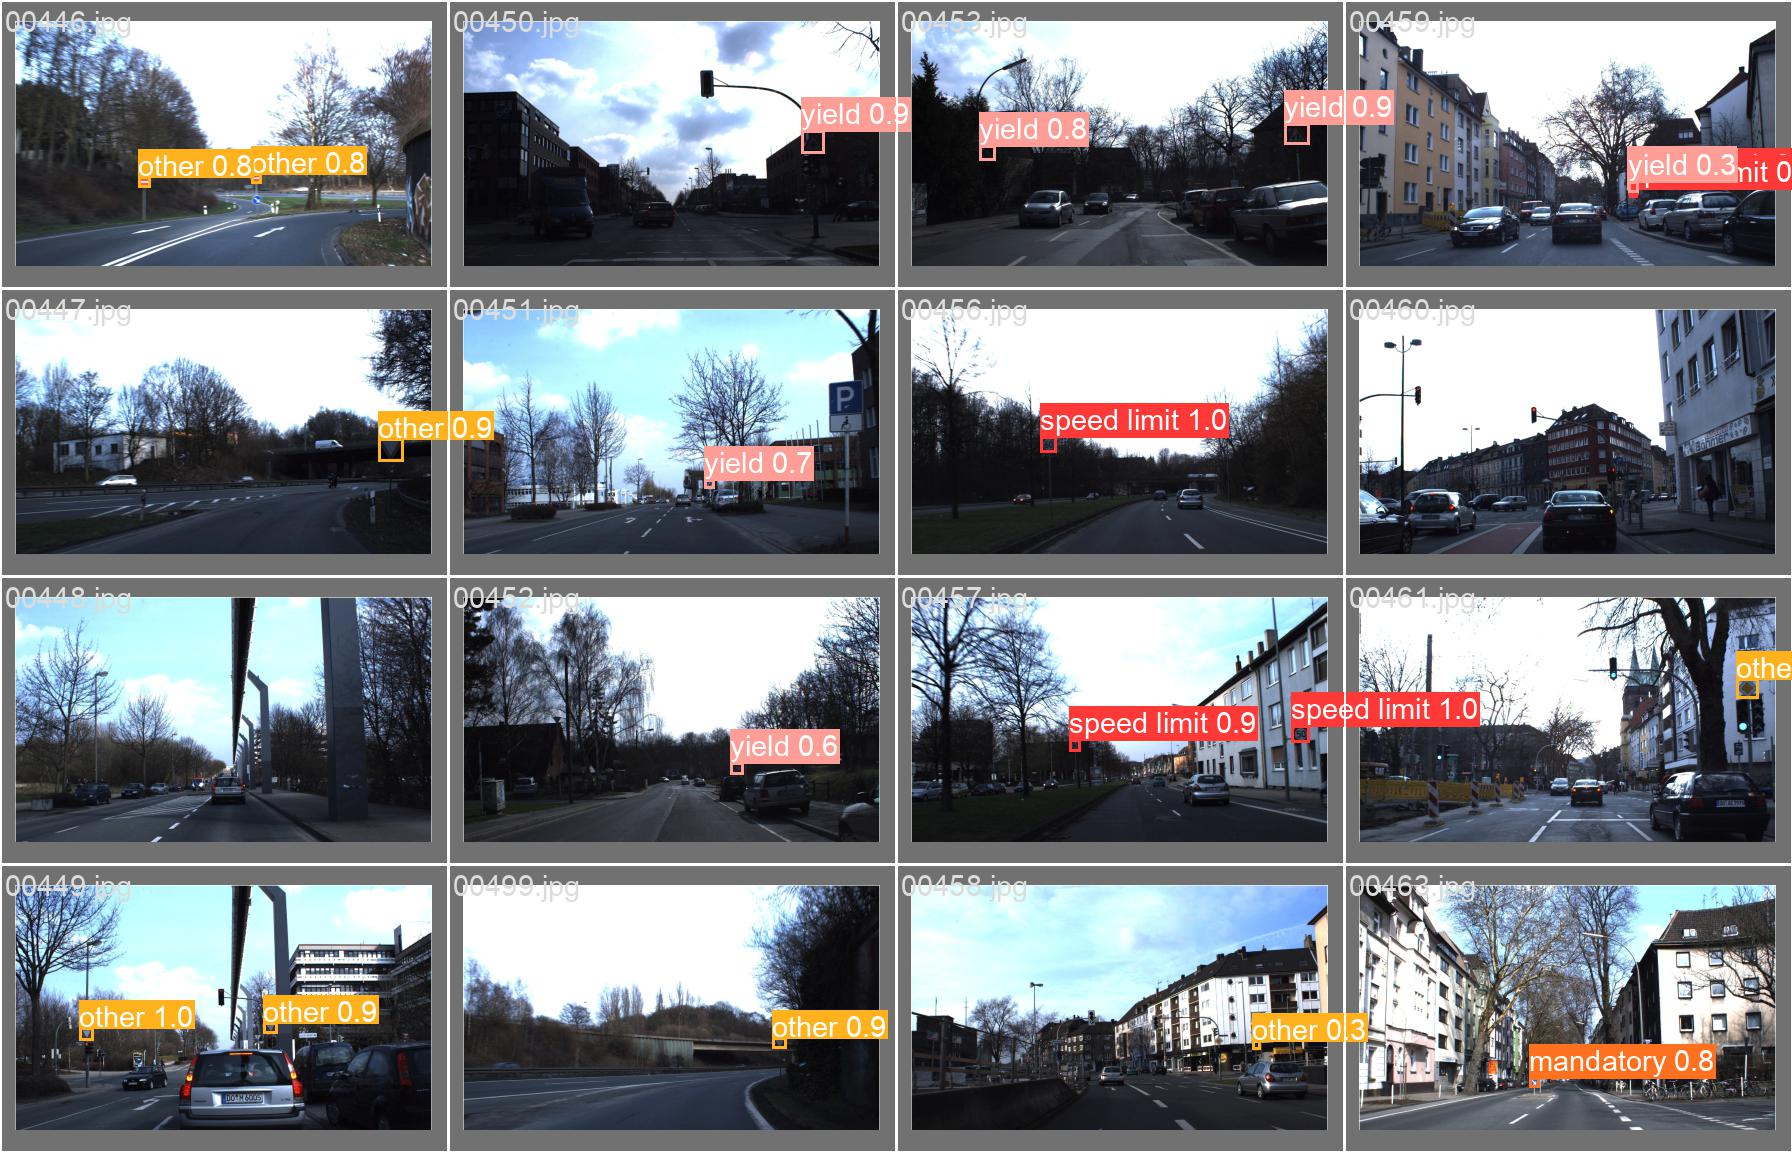

In [ ]:
Image(filename = '/content/yolov5/runs/train/exp/val_batch1_pred.jpg', width = 8000)

In [ ]:

#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25
#detect.py is use to detecting image on test
!python detect.py --source /content/traffic-sign-to-test.mp4 --weights /content/yolov5/runs/train/exp/weights/best.pt
#go and fetch the video from runs/detect/exp(lastnumber)/traffic-sign-test.mp4

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/traffic-sign-to-test.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-163-g016e046 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/56) /content/traffic-sign-to-test.mp4: 384x640 2 speed limits, 41.9ms
video 1/1 (2/56) /content/traffic-sign-to-test.mp4: 384x640 2 speed limits, 7.9ms
video 1/1 (3/56) /content/traffic-sign-to-test.mp4: 384x640 2 speed limits, 7.9ms
vide

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom',path='/content/yolov5/runs/train/exp/weights/best.pt')

/usr/local/lib/python3.8/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


[Errno 2] No such file or directory: '/usr/local/lib/python3.8/dist-packages/numpy-1.21.6.dist-info/METADATA'


YOLOv5 🚀 2023-2-1 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Now next step is to convert it into a tflite model, so that we can use it on android phone

you have best.pt and last.pt inside runs\train\exp2\weights

In [ ]:
# Convert weights to fp16 TFLite model

!python export.py --weights /content/yolov5/runs/train/exp/weights/best.pt --include tflite --img 416

export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], imgsz=[416], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/exp/weights/best.pt with output shape (1, 10647, 9) (13.6 MB)
2023-02-01 06:24:48.318660: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/local/lib/python3.8/dist-packages/cv2/..

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

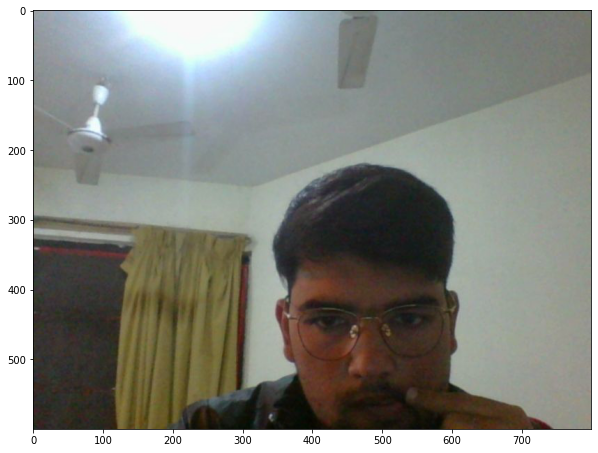

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)

var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='photo.jpg', quality=0.8, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))
#   with open(filename, 'wb') as f:
#     f.write(binary)
#   return len(binary)


img = take_photo() # click


import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:

import base64
import html
import io
import time

from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np
from PIL import Image
import cv2

def start_input():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 512, 512);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }
      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);
      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();
      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 512; //video.videoWidth;
      captureCanvas.height = 512; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function takePhoto(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }
      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def take_photo(label, img_data):
  data = eval_js('takePhoto("{}", "{}")'.format(label, img_data))
  return data

In [ ]:
start_input()
label_html = 'Capturing...'
img_data = ''

while True:
  capture_start = time.time()
  js_reply = take_photo(label_html, img_data)
  capture_end = time.time()
  if not js_reply:
    break

<IPython.core.display.Javascript object>

In [ ]:
def js_reply_to_image(js_reply):
    """
    input:
          js_reply: JavaScript object, contain image from webcam
    output:
          image_array: image array RGB size 512 x 512 from webcam
    """
    jpeg_bytes = base64.b64decode(js_reply['img'].split(',')[1])
    image_PIL = Image.open(io.BytesIO(jpeg_bytes))
    image_array = np.array(image_PIL)

    return image_array